In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')

In [2]:
hdiab = pd.read_csv('Data/health care diabetes.csv')

In [3]:
hdiab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
hdiab.shape

(768, 9)

#### Missing values

In [5]:
hdiab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<span style="color: orange;">__*Insights*__</span>
* There is no `NaN` values
* All columns are of float or integer type

In [6]:
hdiab.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<span style="color: orange;">__*Insights*__</span>
* Some of the columns such as (`Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`) have 0 as minimum value, which can't be possible. So these values are `NaN`

In [7]:
columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
hdiab[columns] = hdiab[columns].applymap(lambda x: np.NaN if x==0 else x)
hdiab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [8]:
hdiab.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<span style="color: orange;">__*Insights*__</span>
* So `Insulin` and `SkinThickness` columns have too much null values

#### Count plot

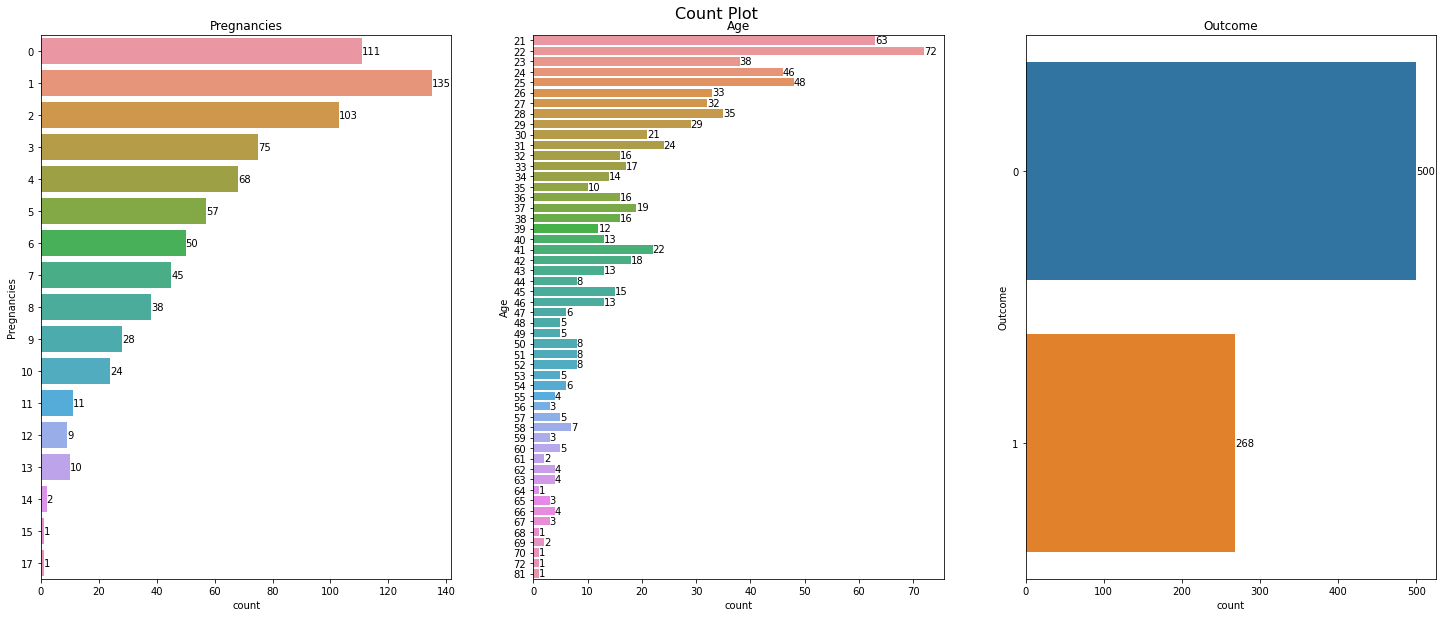

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(25, 10))
fig.suptitle('Count Plot', fontsize=16, y=0.92)

features = ['Pregnancies', 'Age', 'Outcome']
for i, col in enumerate(features):
    graph = sns.countplot(y=hdiab[col], ax=ax[i])
    ax[i].set_title(*[col])
    graph.bar_label(graph.containers[0])

<span style="color: orange;">__*Insights*__</span> <br>
* Pregnancies ranges from 0 to 17
* Age ranges from 21 to 81
* There is more values in 0 class incompared of 1. And this 

**Note:** We didn't plotted count plot for other columns even being a `int64` data type columns, because there are continuous in nature

#### Distribution Analysis

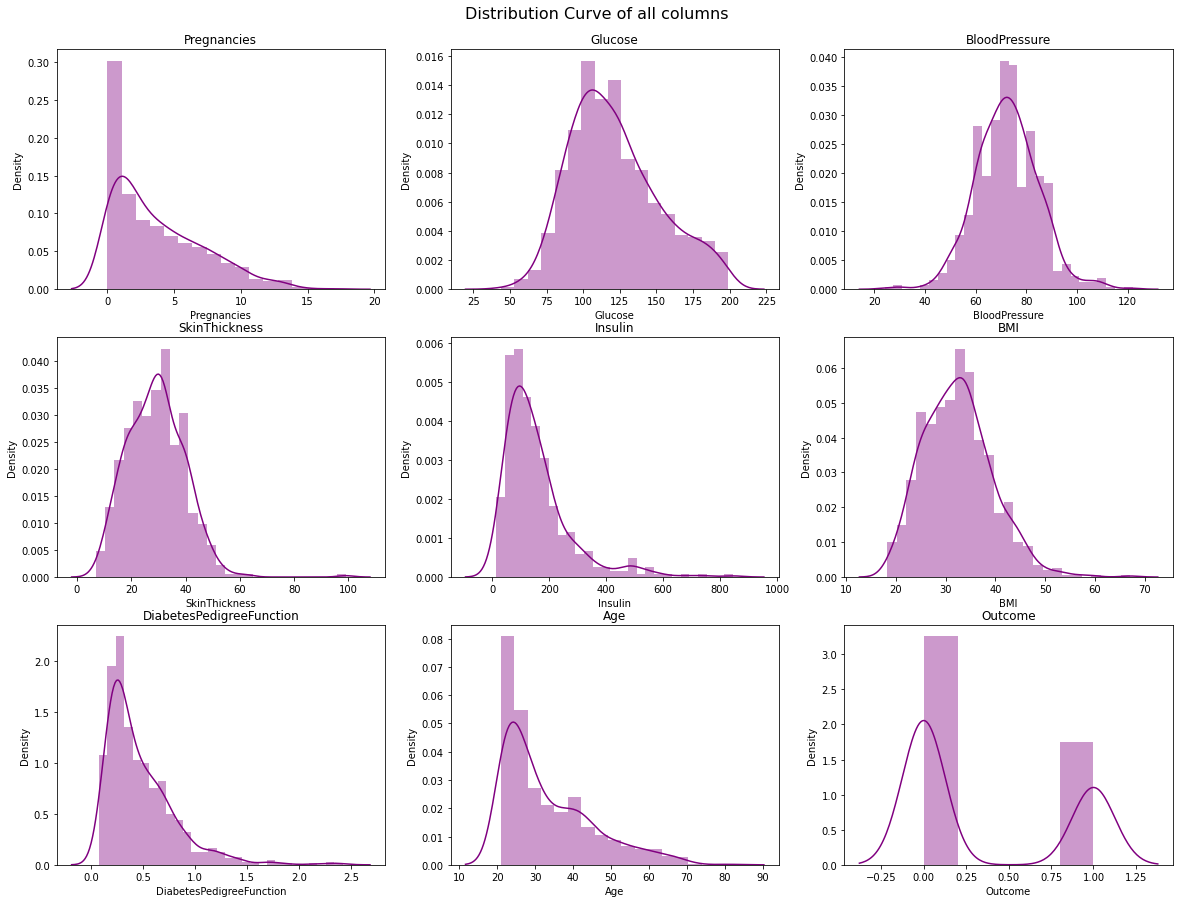

In [10]:
fig, ax = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Distribution Curve of all columns', fontsize=16, y=0.92)
col = 0
column = hdiab.columns
for i in range(3):
    for j in range(3):
        sns.distplot(hdiab[column[col]], color='purple', ax=ax[i][j])
        ax[i][j].set_title(*[column[col]])
        col+=1

<span style="color: orange;">__*Insights*__</span>
* It seems most of the columns are right skewed except `Glucose`, `BloodPressure`

#### Outlier Detection

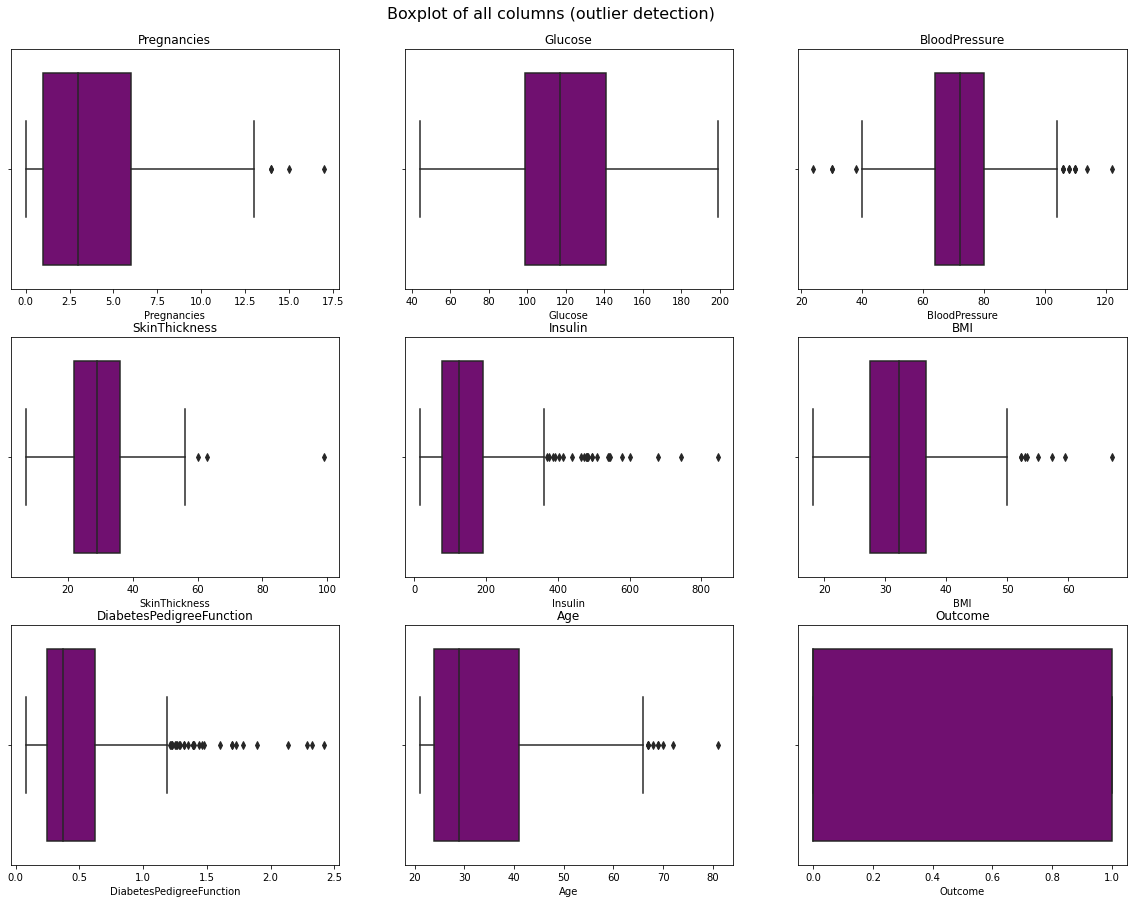

In [56]:
fig, ax = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Boxplot of all columns (outlier detection)', fontsize=16, y=0.92)
col = 0
column = hdiab.columns
for i in range(3):
    for j in range(3):
        sns.boxplot(hdiab[column[col]], color='purple', ax=ax[i][j])
        ax[i][j].set_title(*[column[col]])
        col+=1

<span style="color: orange;">__*Insights*__</span>
* `Insulin` and `DiabetesPedigreeFunction` seems to have high number of outliers
* It doesn't seem `Glucose` column have any outliers

#### Correlation

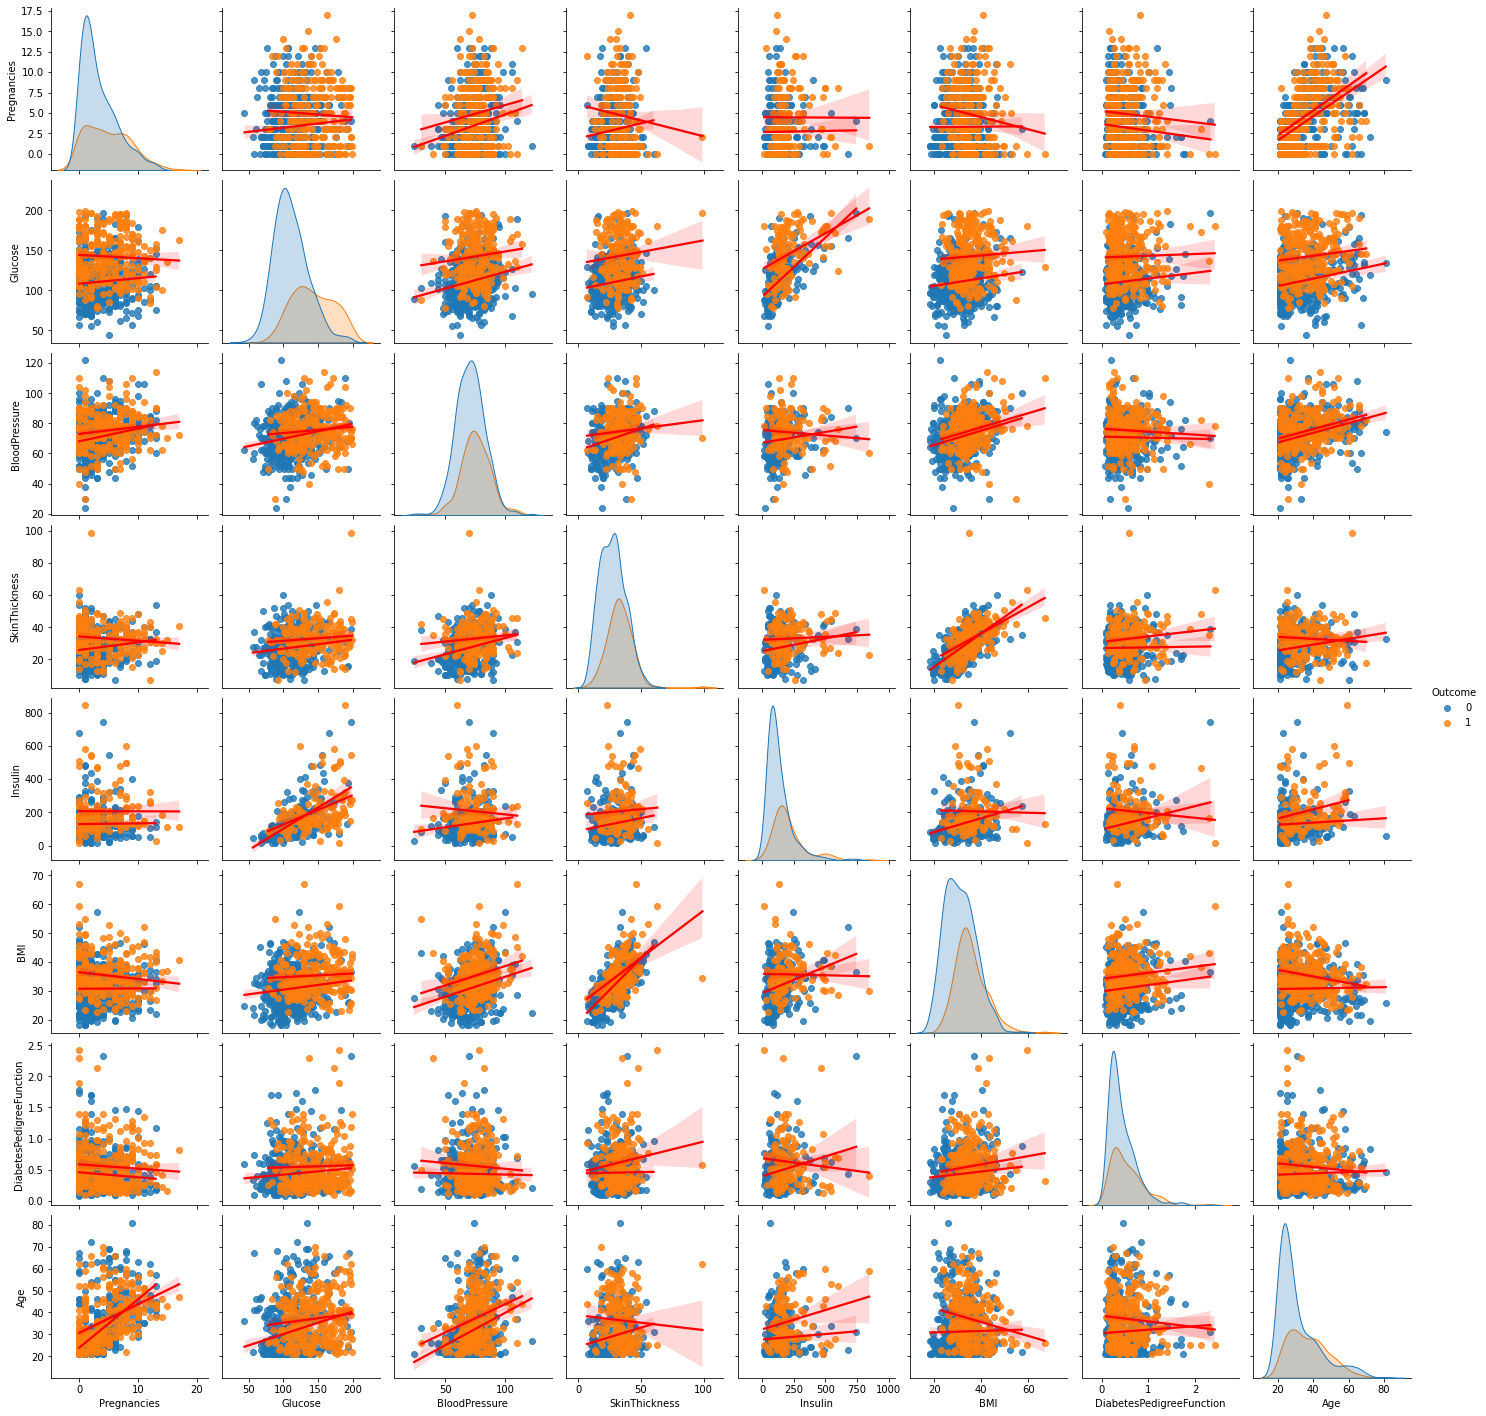

In [18]:
sns.pairplot(hdiab, hue='Outcome', kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

<span style="color: orange;">__*Insights*__</span>
* It seems that these columns are not linearly separable
* Also there seems to be little Multi-collinearity like (`BMI`,`SkinThickness`) and (`Glucose`, `Insulin`) is correleated.

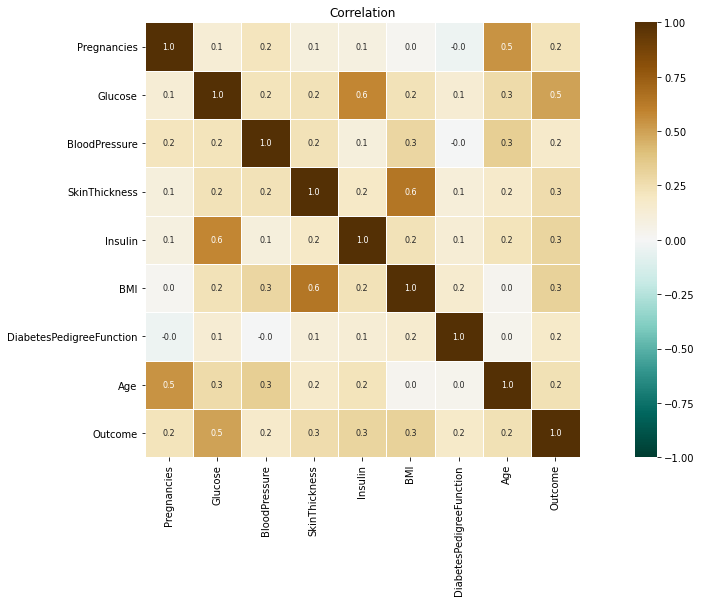

In [25]:
corr = hdiab.corr()
# seaborn heatmap best parameter
plt.figure(figsize=(20,8))
sns.heatmap(corr, vmax=1, vmin=-1, center=0,
			linewidth=.5,square=True, annot = True,
            annot_kws = {'size':8},fmt='.1f', cmap='BrBG_r') # cbar_kws: for positioning cbar and "shrink" for reducing cbar size
plt.title('Correlation')
plt.show()

<span style="color: orange;">__*Insights*__</span>
* It dosen't seems to be any columns higly correlated with `Outcome`